### Reproducing Zappa & Shapherd 2017 using StorylineTool and ESMValTool recipe output
Package dependencies

In [3]:
#### Imports
import xarray as xr
import numpy as np
import pandas as pd
import plot_functions as func
### Import storyline package

### Work folder from recipe
folder = '/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/work/multiple_regression_indices'

### Target spread
In the paper, Figure 1 illustrates the ensemble spread by showing the wind change in three different models. Here we plot the wind change in the same models, but from the CMIP6 version

In [1]:
### Plot three different models in Stereographic projection

pr_ACCESS_CM2 = st.model_change("pr","ACCESS-CM2")
pr_CanESM5 = st.model_change("pr","CanESM5")
pr_MEM = st.multimodel_mean("pr")

st.plot_multiple_maps({"CMIP6 mean": pr_MEM,"ACCESS-CM2":pr_ACCESS_CM2,"CanESM5":pr_CanESM5},cmpa='RdBu',levels=np.arange(-2.4,2.6,0.2))

In addition, we here show the spread in precipitation showing the stippling from Zappa, Bavaqua and Shepherd (2021)

In [ ]:
### Plot precipitation change with stippling
### Define the region

st.region_definition()
st.season_definition()
st.plot_uncertainty("pr")

### Remote driver spread

Figure 2 of the paper shows the spread in the remote drivers and global warming. Here we show the same but with CMIP6 models. 

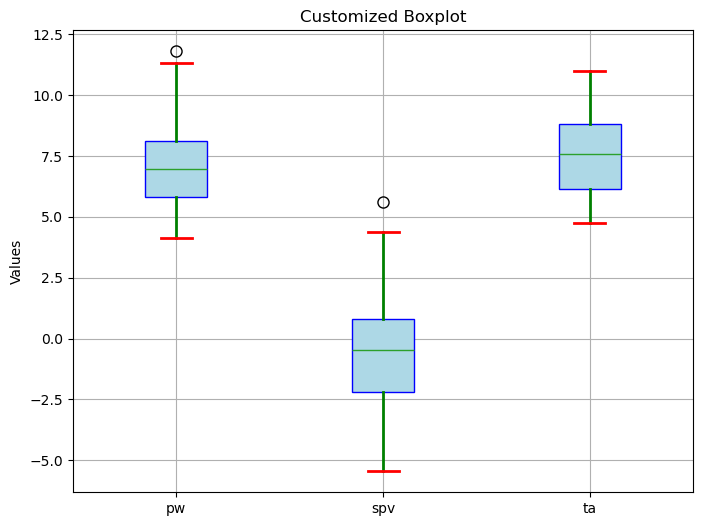

In [139]:
### Plot boxplot of Global Warming, Tropical Warming, Polar Warming and Stratospheric Polar Vortex
#rd_dict = st.remote_drivers(["spv","pw","ta"])
rds = pd.read_csv("/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/work/multiple_regression_indices/multiple_regresion/remote_drivers/drivers.csv", index_col=0)
models = rds.index.tolist()
# Enhanced boxplot with customizations
plt.figure(figsize=(8, 6))
rds.boxplot(patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='green', linewidth=2),
           capprops=dict(color='red', linewidth=2),
           flierprops=dict(marker='o', color='black', markersize=8))

plt.title('Customized Boxplot')
plt.ylabel('Values')
plt.show()


### Multiple linear regression

Now, we plot the results from the multiple linear regression for both target variables, wind and precipitation. 

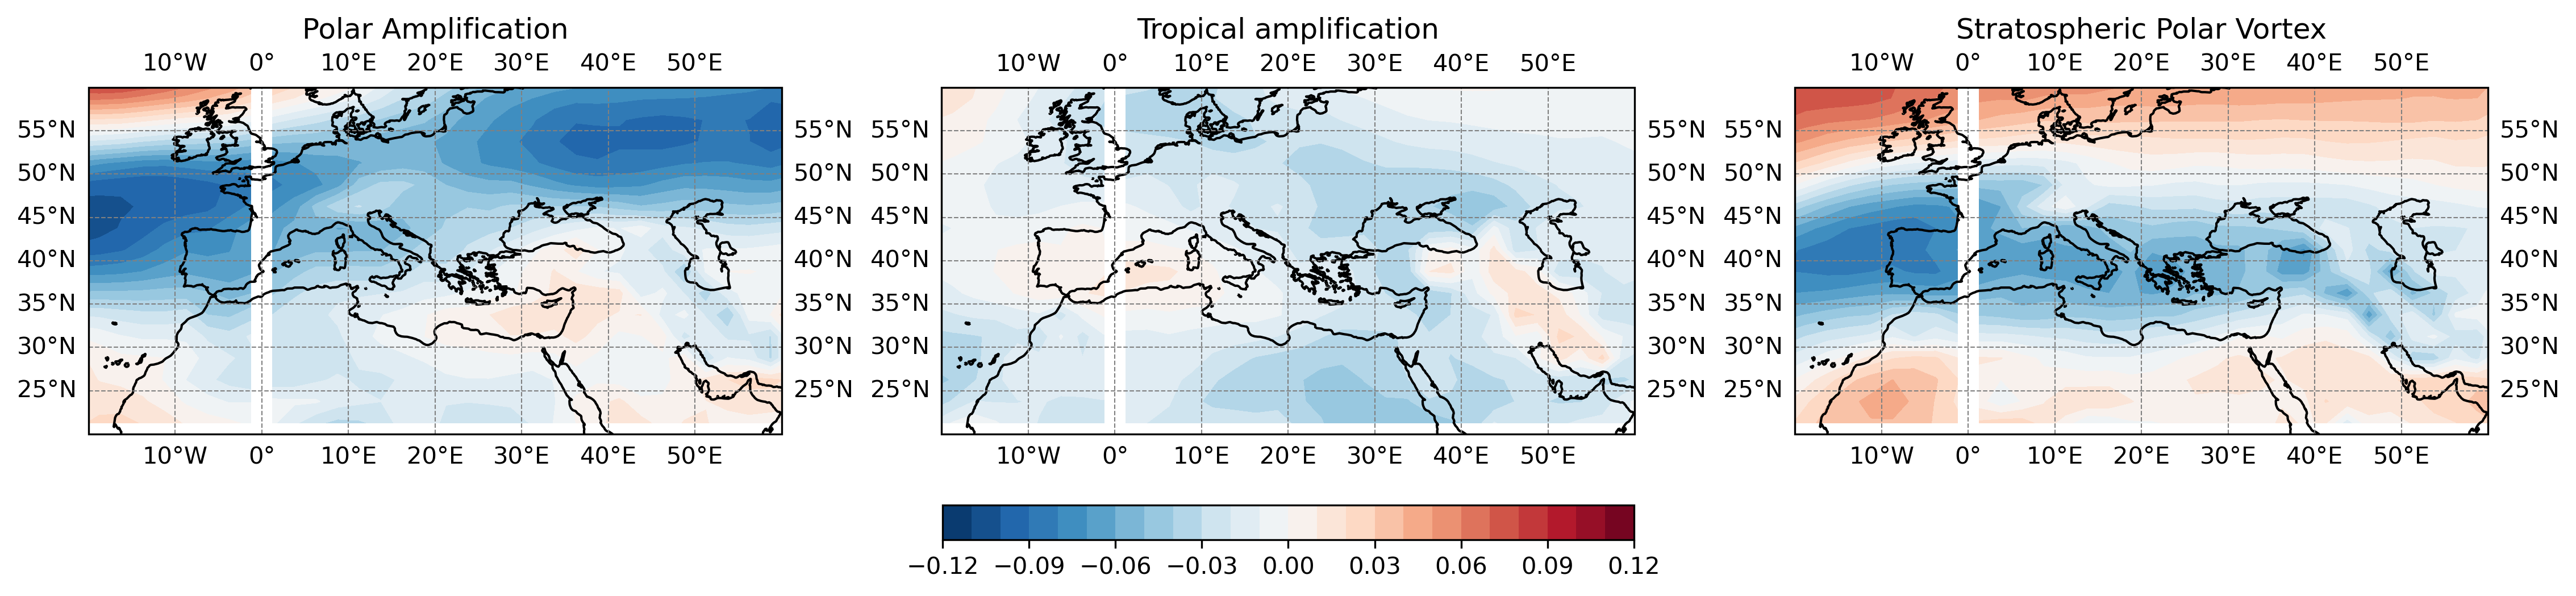

In [136]:

def create_three_panel_figure(data_list, extent_list, levels_list, cmaps_list, titles, figsize=(15, 5)):
    """
    Creates a figure with three panels in a row.
    
    Parameters:
    - data_list: List of 2D arrays or datasets to plot.
    - extent_list: List of extents for each map [lon_min, lon_max, lat_min, lat_max].
    - levels_list: List of levels for contour plots.
    - cmaps_list: List of colormap names for each map.
    - titles: Titles for each subplot.
    - figsize: Size of the overall figure (default is (15, 5)).
    """
    
    # Create the figure and use a specific projection for Cartopy maps
    fig, axs = plt.subplots(1, 3, figsize=figsize, dpi=300, constrained_layout=True,
                            subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Iterate through each map and plot it
    for i, ax in enumerate(axs):
        # Set the extent for each map using the provided extents
        ax.set_extent(extent_list[i], crs=ccrs.PlateCarree())
        
        # Add coastlines and gridlines
        ax.coastlines()
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
        
        # Plot the data (assuming `data_list` contains 2D arrays or DataArrays)
        im = ax.contourf(data_list[i].lon, data_list[i].lat, data_list[i].values,
                         levels=levels_list[i], cmap=cmaps_list[i], transform=ccrs.PlateCarree())
        
        # Set the title for each subplot
        ax.set_title(titles[i], fontsize=12)
    
    # Add a single colorbar at the bottom of the plots
    fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    
    # Show the figure
    plt.show()


data = xr.open_dataset(folder+'/multiple_regresion/regression_output/ua/regression_coefficients.nc').sel(lat=slice(-88,88)) 
coefficients = [ data.pw, data.ta, data.spv ]
levels = [np.arange(-.12,.13,.01)] * 3
extent = [[-20,60,20,60]] * 3
cmaps = ['RdBu_r'] * 3
titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_three_panel_figure(coefficients, extent, levels, cmaps, titles)

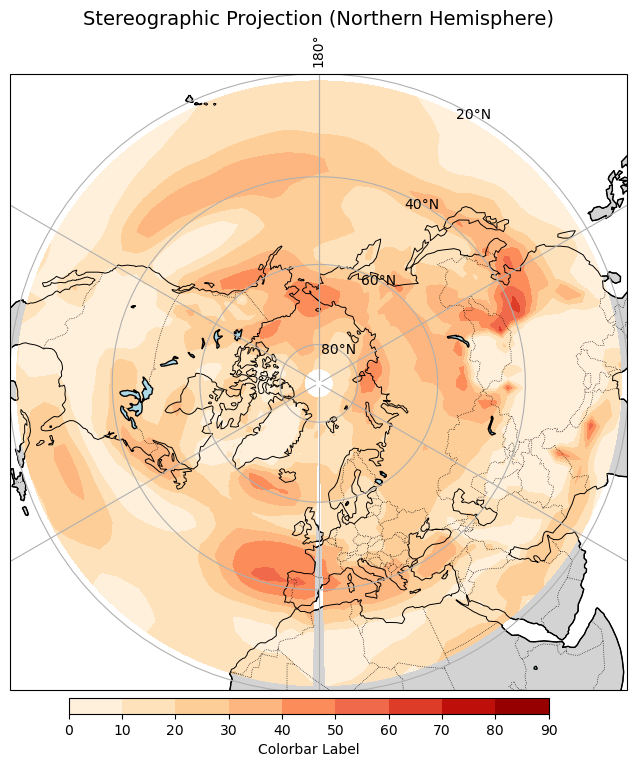

In [118]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

data = xr.open_dataset('/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/work/multiple_regression_indices/multiple_regresion/regression_output/ua/R2.nc').sel(lat=slice(-88,88)).ua * 100
levels = np.arange(0,100,10)

# Create a figure and an axis with stereographic projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.Stereographic(central_longitude=0, central_latitude=90))

# Set the extent to focus on the Northern Hemisphere
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

# Plot the data
im = ax.contourf(data.lon, data.lat, data, levels=levels, cmap="OrRd", transform=ccrs.PlateCarree())

# Add a colorbar
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Colorbar Label')  # Add your label here

# Add map features (e.g., coastline, borders)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.gridlines(draw_labels=True)

# Optionally, add other features like lakes, land, or rivers
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')

# Set the title
ax.set_title("Stereographic Projection (Northern Hemisphere)", fontsize=14)

# Show the map
plt.show()


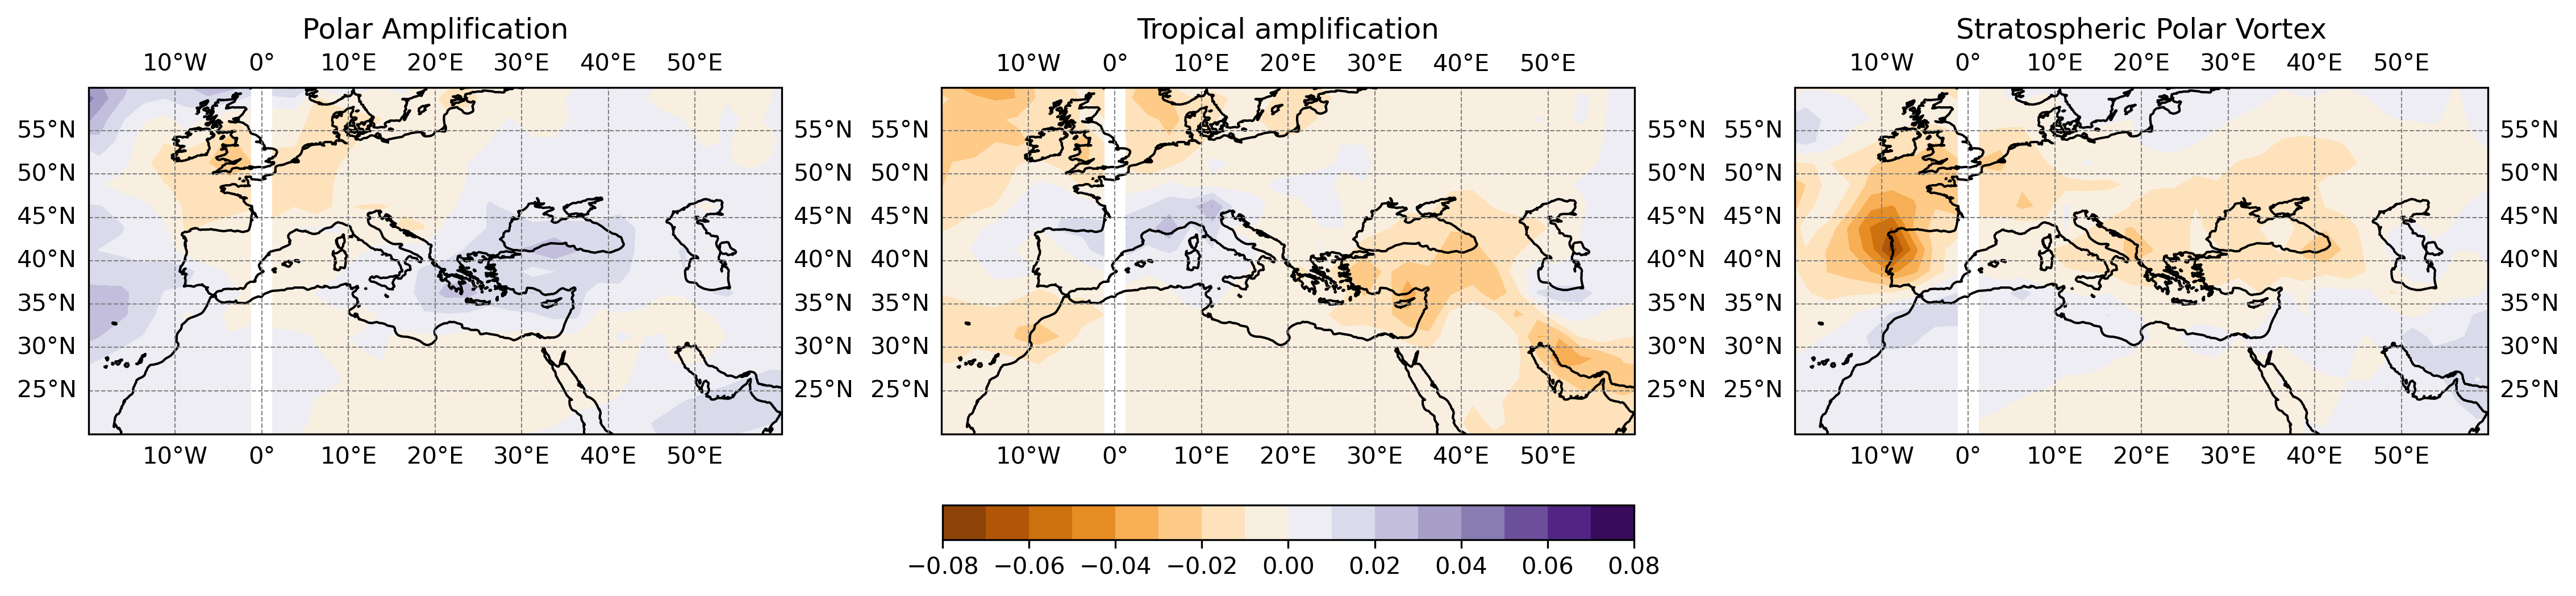

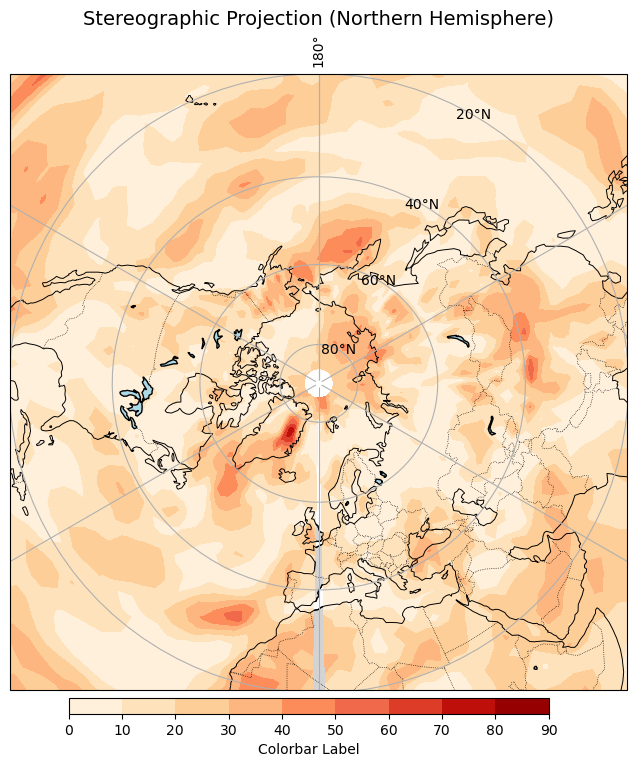

In [130]:
dato = xr.open_dataset(folder+'/multiple_regresion/regression_output/pr/regression_coefficients.nc').sel(lat=slice(-88,88)) * 86400
sc = 1.26
coefficients = [ dato.pw, dato.ta, dato.spv ]
levels = [np.arange(-.08,.09,.01)] * 3
extent = [[-20,60,20,60]] * 3
cmaps = ['PuOr'] * 3
titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_three_panel_figure(coefficients, extent, levels, cmaps, titles)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

data = xr.open_dataset('/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/work/multiple_regression_indices/multiple_regresion/regression_output/pr/R2.nc').sel(lat=slice(-88,88)).pr * 100
levels = np.arange(0,100,10)

# Create a figure and an axis with stereographic projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.Stereographic(central_longitude=0, central_latitude=90))

# Set the extent to focus on the Northern Hemisphere
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

# Plot the data
im = ax.contourf(data.lon, data.lat, data, levels=levels, cmap="OrRd", transform=ccrs.PlateCarree())

# Add a colorbar
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Colorbar Label')  # Add your label here

# Add map features (e.g., coastline, borders)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.gridlines(draw_labels=True)

# Optionally, add other features like lakes, land, or rivers
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')

# Set the title
ax.set_title("Stereographic Projection (Northern Hemisphere)", fontsize=14)

# Show the map
plt.show()


### Storyline evaluation

Plot ellipse with Tropical Warming and Stratospheric Polar Vortex and the precipitation and wind changes associated with each storyline. 

['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2-WACCM', 'CESM2', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'E3SM-1-0', 'EC-Earth3', 'FGOALS-g3', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'MCM-UA-1-0', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']
90.0
90.0
90.0


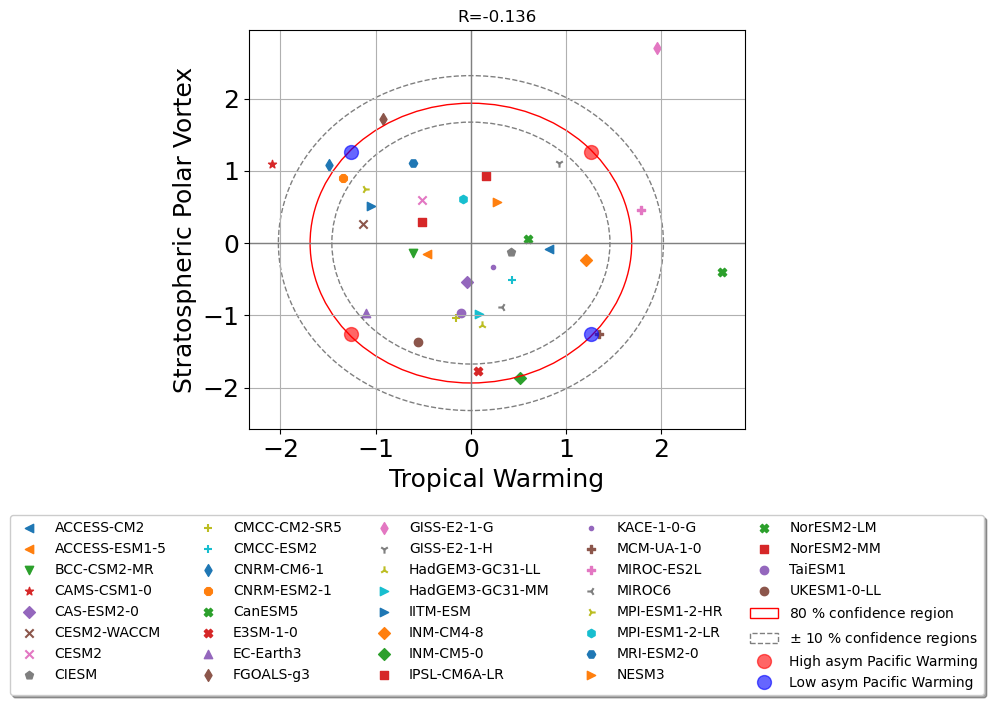

In [141]:
### Plot ellipse

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from numpy import linalg as la
from sklearn.linear_model import LinearRegression

def confidence_ellipse(x ,y, ax, corr,chi_squared=3.21, facecolor='none',**kwargs):
 if x.size != y.size:
  raise ValueError('x and y must be the same size')

 cov = np.cov(x,y)
 pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
 eigval, eigvec = la.eig(cov)
 largest_eigval = np.argmax(eigval)
 largest_eigvec = eigvec[:,largest_eigval]
 smallest_eigval = np.argmin(eigval)
 smallest_eigvec = eigvec[:,smallest_eigval]
 lamda1 = np.max(eigval)
 lamda2 = np.min(eigval)

 scale_x = np.sqrt(lamda1)
 scale_y = np.sqrt(lamda2)
 if corr == 'no':
    angle = 90.0 #np.arctan(smallest_eigvec[0]/smallest_eigvec[1])*180/np.pi
 else:
    angle = np.arctan(smallest_eigvec[0]/smallest_eigvec[1])*180/np.pi

 # Using a special case to obtain the eigenvalues of this
 # two-dimensionl dataset. Calculating standard deviations

 ell_radius_x = scale_x*np.sqrt(chi_squared)
 ell_radius_y = scale_y*np.sqrt(chi_squared)
 ellipse = Ellipse((0, 0), width=ell_radius_x * 2,height=ell_radius_y * 2, angle = -angle, facecolor=facecolor,**kwargs)

 # Calculating x mean
 mean_x = np.mean(x)
 # calculating y mean
 mean_y = np.mean(y)

 transf = transforms.Affine2D() \
     .translate(mean_x, mean_y)

 ellipse.set_transform(transf + ax.transData)
 return ax.add_patch(ellipse), print(angle), ellipse


def plot_ellipse(models,x,y,corr='no',x_label='Eastern Pacific Warming [K K$^{-1}$]',y_label='Central Pacific Warming [K K$^{-1}$]'):
    #Compute regression y on x
    x1 = x.reshape(-1, 1)
    y1 = y.reshape(-1, 1)
    linear_regressor = LinearRegression()  # create object for the class
    reg = linear_regressor.fit(x1, y1)  # perform linear regression
    X_pred = np.linspace(np.min(x)-1, np.max(x)+0.5, 31)
    X_pred = X_pred.reshape(-1, 1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    c = reg.coef_

    #Compute regression x on y
    reg2 = linear_regressor.fit(y1, x1)  # perform linear regression
    Y_pred2 = np.linspace(np.min(y), np.max(y), 31)
    Y_pred2 = Y_pred2.reshape(-1, 1)
    X_pred2 = linear_regressor.predict(Y_pred2)  # make predictions
    c2 = reg2.coef_

    #Define limits
    min_x = np.min(x) - 0.2*np.abs(np.max(x) - np.min(x))
    max_x = np.max(x) + 0.2*np.abs(np.max(x) - np.min(x))
    max_y = np.max(y) + 0.2*np.abs(np.max(y) - np.min(y))
    max_y = np.min(y) - 0.2*np.abs(np.max(y) - np.min(y))
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    #Calcular las rectas x = y, x = -y
    Sx = np.std(x)
    Sy = np.std(y)
    S_ratio = Sy/Sx
    YeqX = S_ratio*X_pred - S_ratio*mean_x + mean_y
    YeqMinsX = S_ratio*mean_x + mean_y - S_ratio*X_pred


    #Plot-----------------------------------------------------------------------
    markers = ['<','<','v','*','D','x','x','p','+','+','d','8','X','X','^','d','d','1','2','>','>','D','D','s','.','P', 'P', '3','4','h','H', '>','X','s','o','o',]
    print(models)
    fig, ax = plt.subplots()
    for px, py, t, l in zip(x, y, markers, models):
       ax.scatter(px, py, marker=t,label=l)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
    confidence_ellipse(x, y, ax,corr,edgecolor='red',label='80 $\%$ confidence region')
    confidence_ellipse(x, y, ax,corr,chi_squared=4.6,edgecolor='k',linestyle='--',alpha=0.5,label='$\pm$ 10 $\%$ confidence regions')
    confidence_ellipse(x, y, ax,corr,chi_squared=2.4,edgecolor='k',linestyle='--',alpha=0.5)
    ax.axvline(mean_x, c='grey', lw=1)
    ax.axhline(mean_y, c='grey', lw=1)
    ax.grid()
    ax.tick_params(labelsize=18)
    if corr == 'yes':
        r = np.corrcoef(x,y)[0,1]; chi = (1.26**2)*2
        ts1 = np.sqrt(((1-r**2)/(2*(1-r)))*chi)
        ts2 = np.sqrt(((1-r**2)/(2*(1+r)))*chi)
        story_x1 = [mean_x + ts1*np.std(x)]
        story_x2 = [mean_x - ts1*np.std(x)]
        story_y_red1 = [mean_y + ts1*np.std(y)]
        story_y_red2 =[mean_y - ts1*np.std(y)]
        ax.plot(story_x1, story_y_red1, 'ro',alpha = 0.6,markersize=10,label='storylines')
        ax.plot(story_x2, story_y_red2, 'ro',alpha = 0.6,markersize=10)
    elif corr == 'ma':
        r = np.corrcoef(x,y)[0,1]; chi = (1.26**2)*2
        ts1 = np.sqrt(((1-r**2)/(2*(1-r)))*chi)
        ts2 = np.sqrt(((1-r**2)/(2*(1+r)))*chi)
        story_x1 = [mean_x + ts1*np.std(x)]
        story_x2 = [mean_x - ts1*np.std(x)]
        story_y_red1 = [mean_y + ts1*np.std(y)]
        story_y_red2 =[mean_y - ts1*np.std(y)]
        ax.plot(story_x1, story_y_red1, 'ro',alpha = 0.6,markersize=10,label='storylines')
        ax.plot(story_x2, story_y_red2, 'ro',alpha = 0.6,markersize=10) 
    elif corr == 'pacific':
        r = np.corrcoef(x,y)[0,1]; chi = (1.26**2)*2
        ts1 = np.sqrt(((1-r**2)/(2*(1-r)))*chi)
        ts2 = np.sqrt(((1-r**2)/(2*(1+r)))*chi)
        story_x1 = [mean_x + ts1*np.std(x)]
        story_x2 = [mean_x - ts1*np.std(x)]
        story_y_red1 = [mean_y + ts1*np.std(y)]
        story_y_red2 =[mean_y - ts1*np.std(y)]
        ax.plot(story_x2, story_y_red2, 'bo',alpha = 0.6,markersize=10,label='Low asym Pacific Warming')
        ax.plot(story_x1, story_y_red1, 'ro',alpha = 0.6,markersize=10,label='High asym Pacific Warming')  
    elif corr == 'nada':
        r = np.corrcoef(x,y)[0,1]; chi = (1.26**2)*2
    else:
        story_x = [mean_x + 1.26*np.std(x),mean_x - 1.26*np.std(x)]
        story_y_red = [mean_y + 1.26*np.std(y),mean_y - 1.26*np.std(y)]
        story_y_blue =[mean_y - 1.26*np.std(y),mean_y + 1.26*np.std(y)]
        ax.plot(story_x, story_y_red, 'ro',alpha = 0.6,markersize=10,label='High asym Pacific Warming')
        ax.plot(story_x, story_y_blue, 'bo',alpha = 0.6,markersize=10,label='Low asym Pacific Warming')    
    lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=5)
    plt.subplots_adjust(bottom=0.05)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.title('R='+str(round(np.corrcoef(x,y)[0,1],3)))
    #plt.clf
    return fig
    
rds = pd.read_csv("/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/work/multiple_regression_indices/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv", index_col=0)
models = rds.index.tolist()
fig = plot_ellipse(models,rds["spv"].values,rds["ta"].values,corr="no",x_label="Tropical Warming",y_label="Stratospheric Polar Vortex")

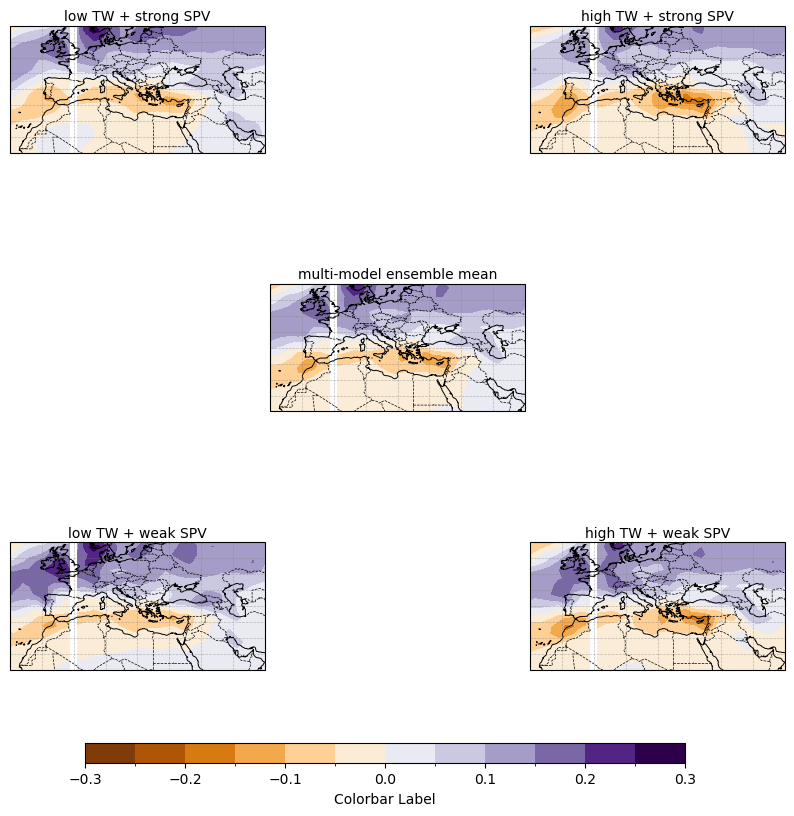

In [142]:
### Plot storyline maps
### Plot coefficients from multiple linear regression for precipitation
dato = xr.open_dataset(folder+'/multiple_regresion/regression_output/pr/regression_coefficients.nc').sel(lat=slice(-88,88)) * 86400
sc = 1.26
storylines = [dato.MEM + sc*dato.spv - sc*dato.ta, dato.MEM + sc*dato.spv + sc*dato.ta, dato.MEM - sc*dato.spv - sc*dato.ta,dato.MEM - sc*dato.spv + sc*dato.ta ,  dato.MEM]
levels = [np.arange(-.3,.35,.05)] * 5
extent = [[-20,60,20,60]] * 5
cmaps = ['PuOr'] * 5
titles = ['low TW + strong SPV','high TW + strong SPV','low TW + weak SPV','high TW + weak SPV','multi-model ensemble mean']
fig = func.create_five_panel_figure(storylines, extent, levels, cmaps, titles, white_range=(-0.1, 0.1))

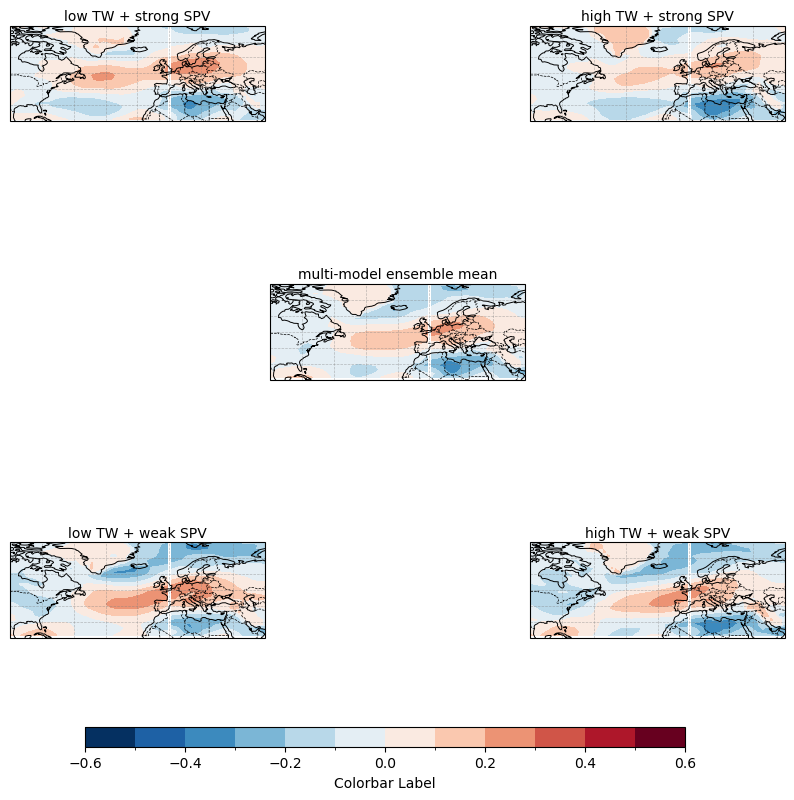

In [143]:
### Plot coefficients from multiple linear regression for wind
dato = xr.open_dataset(folder+'/multiple_regresion/regression_output/ua/regression_coefficients.nc').sel(lat=slice(-88,88))
sc = 1.26
storylines = [dato.MEM + sc*dato.spv - sc*dato.ta, dato.MEM + sc*dato.spv + sc*dato.ta, dato.MEM - sc*dato.spv - sc*dato.ta,dato.MEM - sc*dato.spv + sc*dato.ta ,  dato.MEM]
levels = [np.arange(-.6,.7,.1)] * 5
extent = [[-100,60,20,80]] * 5
cmaps = ['RdBu_r'] * 5
titles = ['low TW + strong SPV','high TW + strong SPV','low TW + weak SPV','high TW + weak SPV','multi-model ensemble mean']
fig = func.create_five_panel_figure(storylines, extent, levels, cmaps, titles, white_range=(-0.1, 0.1))
# Save figures
path_plots = '/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/plots/multiple_regression_indices/multiple_regresion/regression_output'

### Next steps?